В данном проекте мы рассмотрим данные об компьютерных играх, их рейтингах и оценках пользователей и критиков. На основе этих данных необходимо определить закономерности для понимания успешности игры. Загрузим датасет и рассморти данные и их корректность. 

<h2> В данном проекте произвожу анализ таблиц. В первом этапе проекта произвожу очистку данных. Далее производится непосредственно анализ и определения закономерностей успешности игры.<a class="tocSkip"><h2>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/datasets/games.csv")

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данном датасете для начала необходимо привести названия всех столбцов к нижнему регистру. 

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data = data.rename(columns = {'Name':"name", 'Platform':"platform", 'Year_of_Release':'year_of_release', "Genre":"genre", 'NA_sales':'na_sales', 
                              'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score',
                             'User_Score': 'user_score', 'Rating':'rating'})

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь рассмотрю какие в данных есть пропуски, нулевые значения, их природу и проанализирую необходимость заменить их.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Строки с пропущенным именем не дадут нам никакой значимой информации, пожтому считаю необходимым их удалить

In [9]:
data = data.dropna(subset = ["name"])

Пропущенные данные в столбце year_of_release могут быть пропущены из-за ошибки сотруднка, заполняющего данные. Посчитаем какую часть строки с пропущенными данными составляют от всех данных в таблице.

In [10]:
data["year_of_release"].isna().sum()/len(data)

0.016095255190570215

Пропущенные данные в столбце года релиза составляют всего 1.6 процента от общего обьема данных. Таким образом считаю необходимым удалить эти данные, так как из-за их малого обьема влияние на общую картину будет минимальным.

In [11]:
data = data.dropna(subset = ["year_of_release"])

Данные в столбцах critic_score и user_score считаю необходимым заполнить медианой, так как медианные значения не сдвинут распределение величин в этих столбцах в какую-либо сторону к макимуму или минимуму. В столбце user_score присутствуют значения tbd - to be determined, не определен. Считаю необходимым заменить эти значения также на медиану

In [12]:
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data.loc[data["user_score"] == "tbd", "user_score"] = np.nan

In [14]:
data["user_score"] = data["user_score"].fillna(-1)
data["critic_score"] = data["critic_score"].fillna(-1)

В столбце rating считаю необходщимым заменить 0 значения на RP, так как рейтинга в этих столбцах нет скорее всего потому что он еще ожидается.

In [15]:
data.loc[data["rating"] == "RP", "rating"] == np.nan
data["rating"] = data["rating"].fillna("Unknown")

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Согласен с вашим замечанием, заменим пропуски в столбцах с рейтингом критиков и пользователей значением-заглушкой -1 для того чтобы не смещать значения в этих столбцах. При анализе данных в этих столбцах, значения столбцов с -1 не будем учитывать. В столбце с возрастным рейтингом заменим все нулевые значения на Unknown. Также значения RP тоже заменим на значения Unknown, для более правильного учета значений
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Согласен с такой обработкой
</div>

In [16]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Таким образом все 0 значения из таблицы были заменены. Теперь заменим тип значений в некоторых столбцах. В столбце year_of_release заменим тип на int, так как в столбце содержится только год и все подсчеты можно производить в столбце с типом int, в столбце critic_score заменим тип на int, так как в нем только целочисленные значения.

In [17]:
data["year_of_release"] = data["year_of_release"].astype("int")
data["critic_score"] = data["critic_score"].astype("int")
data["user_score"] = data["user_score"].astype("float")

Также рассмотрим явные дубликаты в датасете

In [18]:
data.duplicated().sum()

0

Явных дубликатов в датасете нет. Все преобразования с данными сделаны и даны приведены к приемлемому виду, теперь создадим столбец с суммарными продажами по всем регионам для каждой игры.

In [19]:
def sum_sales(row):
    return row["na_sales"] + row["eu_sales"] + row["jp_sales"] + row["other_sales"]

In [20]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,Unknown


In [21]:
data["sum_sales"] = data.apply(sum_sales, axis = 1)

Итоговая таблица:

In [22]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,Unknown,0.01


Предобработку данных считаю законченной, приступим к исследовательскому анализу данных

Рассмотрим распределение количества игр по годам и определим все ли периоды важны для прогноза продаж игр на 2017 год.

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

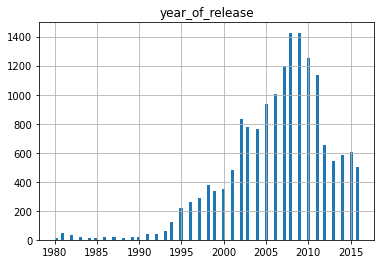

In [23]:
data.hist("year_of_release", bins = 100)

In [24]:
data["year_of_release"].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [25]:
data["year_of_release"].mean() - 3*data["year_of_release"].std()

1988.8596808453128

In [26]:
data["year_of_release"].mean() + 3*data["year_of_release"].std()

2024.1128319253028

По графику видно, что наибольшое количество игр выпускалось в 2006, 2007 годах. Распределение скошено влево, имееются выбросы, по правилу 3 сигм выбросами являются игры выпущенные до 1989 года. 

In [27]:
top_platform = data.pivot_table(index = "platform", values = "sum_sales", aggfunc = "sum")

In [28]:
top_platform.sort_values(by = "sum_sales", ascending = False).head(5)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Для получения распределения и срока исчезновения старых платформ возьмем топ-5 платформ по продажам и посмотрим их распределение по годам.

In [29]:
sales_to_year = data.pivot_table(index = "year_of_release", columns = "platform", values = "sum_sales", aggfunc = "sum")

In [30]:
sales_to_year = sales_to_year.fillna(0)

<AxesSubplot:xlabel='year_of_release'>

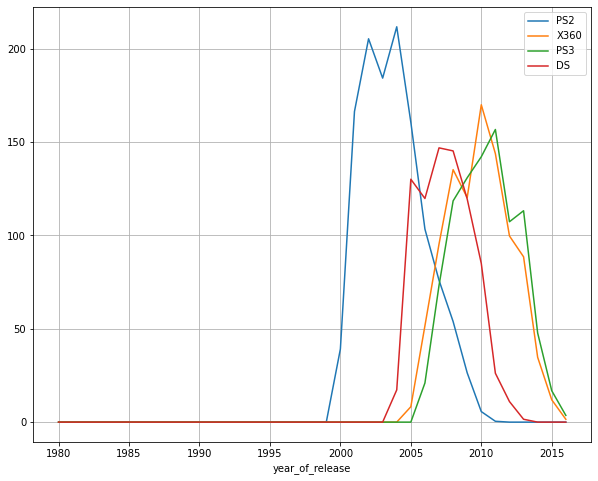

In [31]:
sales_to_year["PS2"].plot(x = sales_to_year.index, y = "sum_sales", legend = True, figsize = (10, 8), grid = True)
sales_to_year["X360"].plot(x = sales_to_year.index, y = "sum_sales", legend = True, grid = True)
sales_to_year["PS3"].plot(x = sales_to_year.index, y = "sum_sales", legend = True, grid = True)
sales_to_year["DS"].plot(x = sales_to_year.index, y = "sum_sales", legend = True, grid = True)

Судя по распределениям продаж самых популярных платформ по годам видно, что в среднем игры на различные платформы продаются в течении 10 лет. Таким образом судя по выбросам и распределению необходимо выделить актуальный период 10 лет, с 2006 года. Так как эти значения нормальные, не являются выбросами и платформы на которые продаются игры в этот период будут актуальными в 2017 году. Считаю целесообразным выбрать для рассмотрения период с 2006 года. Но также стоит отметить, что самые популярные платформы для настоящего времени вышли 4 года назад. Роэтому сократим рассматриваемый период времени и начнем анализировать игры с 2012 года.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>

Не стоит использовать для переменных названия типа а, б - это будет мешать в первую очередь тебе, и твоим читателям, лучше всегда давать осмысленные названия.
    
Тут можно было нарисовать все графики на одном, разные платформы - разными цветами. Так удобнее сравнивать и анализировать данные.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Графики поместил в одну плоскость, таблицы переименовал в смысловые названия.
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Так удобнее анализировать, не так ли?
    
Сократить код для графика можно так
    
    sales_to_year[['XOne','X360','PS2','PS3']].plot()
</div>

In [32]:
data = data[data["year_of_release"] >= 2012]

In [33]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,Unknown,0.01


<div class="alert alert-success">
<h2> Комментарий ревьюера v.2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    

</div>

Далее рассмотрим платформы по продажам игр на них, найдем платформы, которые растут, падают, и сделаем вывод по наиболее прибыльным платформам.

In [34]:
sales = data.pivot_table(index = "platform", columns = "year_of_release", values = "sum_sales", aggfunc = "sum")

In [35]:
sales = sales.fillna(0)

In [36]:
sales = sales[sales[2016] != 0]

In [37]:
sales

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,99.74,88.58,34.74,11.96,1.52
XOne,0.00,18.96,54.07,60.14,26.15


В таблице sales хранится информация о платформах, на которых продаются игры в взятый мной для анализа период, в которых продажи к 2017 году не равняются 0. Необходимо рассмотретьмпродажи на этих платформах и проанализировать, какие из них падают, а какие в будующем году будут наиболее перспективными.

In [38]:
sales = sales.sort_values(by = 2016, ascending = False)
sales

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
PS4,0.00,25.99,100.00,118.90,69.25
XOne,0.00,18.96,54.07,60.14,26.15
3DS,51.36,56.57,43.76,27.78,15.14
PC,23.22,12.38,13.28,8.52,5.25
WiiU,17.56,21.65,22.03,16.35,4.60
PSV,16.19,10.59,11.90,6.25,4.25
PS3,107.36,113.25,47.76,16.82,3.60
X360,99.74,88.58,34.74,11.96,1.52
Wii,21.71,8.59,3.75,1.14,0.18


Судя по значениям в таблице, видно что в 2016 году, продажи игр на всех платформах резко упали. С чем связано падение необходимо разбираться, изучая игровой рынок и новости о событиях происходящих в нем. Возможно, что паление связано с переходом на внутриплатформенные игровые магазины. Но также мы видим основных лидеров на рынке у которых продажи до 2016 года только возрастали. Ими являются новые покаления консолей PS4  и Xbox ONE. Стоит отметить, что по тенденциям на рынке падение продаж старых поколений консолей приурочено к появлению нового поколения консолей от популярных производителей. Поэтому считаю, что игры для Xbox ONE и PS4 будут оставаться самыми популярными до выхода нового поколения. По тенденции видимой из данных, стоит отметить, что скорее всего процент продаж игр на старые поколения консолей будет падать (PS3, Xbox 360, Wii). Также падает спрос на игры для портотивных консолей (PS Vita, Nintendo 3ds, WiiU) скорее всего из-за замены их смартфонами. Таким образом считаю наиболее продаваемыми играми на консоли 4 поколения, также востребованными, но в меньшей мере будут игры на 3DS и WiiU. Также по значениям в таблице видно, что игры для ПК востребованны всегда. ТАким образом считаю, что они также неплохо будут продаваться и в 2017 году.

Дальнейшие исследования считаю необходимым проводить для наиболее перспективных платформ: PS4, Xbox ONE, 3DS, PC, WiiU. Построим для них boxplot и проанализируем результат

<AxesSubplot:title={'center':'sum_sales'}, xlabel='[platform]'>

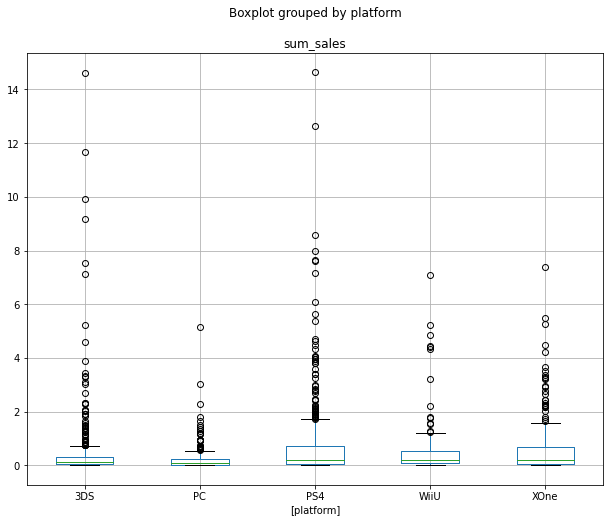

In [39]:
data.loc[(data["platform"] == "PS4") | (data["platform"] == "XOne") | (data["platform"] == "PC") | (data["platform"] == "3DS") | (data["platform"] == "WiiU")].boxplot(column=['sum_sales'], by=['platform'], figsize=(10,8))


In [40]:
ps4 = data[data["platform"] == "PS4"]
ps4["sum_sales"].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

По диаграмме размаха видно, что медиана равняется 0.2 миллионам продаж копий игры, 3 квартель - 0.73 млн. копий, но также есть несколько больших выбросов на в самых популярных играх. Максимальное значение покупок одной игры на PS4 14.63 млн. копий

In [41]:
xbox = data[data["platform"] == "XOne"]
xbox["sum_sales"].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

Ситуация в продажах игр на xbox очень похожа на PS4. Медиана значений примерно такая же и равняется 0.22 млн. копий. 3 кватрель тоже примерно равен, но чуть меньше и равен 0,68 млн. копий. Стоит отметить, что среднее у xbox меньше на 0.15 млн. копий, чем у PS4, так как на PS есть более популярные по продажам игры - выбросы. Выбросы на xbox уходят не так далеко от медианы, как на PS, что скорее всего связано с меньшим числом пользователей xbox

In [42]:
pc = data[data["platform"] == "PC"]
pc["sum_sales"].describe()

count    250.00000
mean       0.25060
std        0.49464
min        0.01000
25%        0.03000
50%        0.08000
75%        0.24000
max        5.14000
Name: sum_sales, dtype: float64

Для PC, как для менее популярной игровой платформы, продажи в разы меньше, чем на двух предыдущих, хотя рассматриваемых игр больше. Медиана равняется 80000 копий. При этом 3 квартель 240000 копий. При этом среднее для продаж на PC в 4 раза больше медианы, так как есть очень популярные эксклюзивы для данной платформы. Максимальное значение продаж - 8 млн. копий.

In [43]:
ds_3 = data[data["platform"] == "3DS"]
ds_3["sum_sales"].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: sum_sales, dtype: float64

Для 3DS медиана и 3 квартель примерно в 2 раза меньше, чем для xbox и PS4 - 110000 и 312500 копий соответственно. Но также есть очень сильные выбросы на эклклюзивах для этой платформы до 14,6 млн. копий.

In [44]:
wiiu = data[data["platform"] == "WiiU"]
wiiu["sum_sales"].describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: sum_sales, dtype: float64

Медиана для данной платформы 0.22 млн. копий, 3 квартель - 0.525 млн. Выбросы есть и достигают 7 млн. копий. Продажи игр на этой платформе не так велеки суммарно, так как она не очень популярна у разработчиков - имеет наименьшее количество игр из всех рассмортенных платформ.

Ограничим значения в boxplot для того чтобы убрать выбросы и лучше рассмотреть распределение.

(0.0, 2.0)

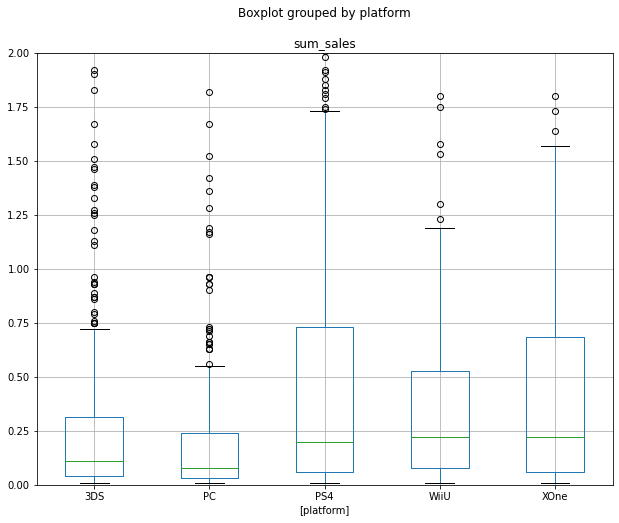

In [45]:
data.loc[(data["platform"] == "PS4") | (data["platform"] == "XOne") | (data["platform"] == "PC") | (data["platform"] == "3DS") | (data["platform"] == "WiiU")].boxplot(column=['sum_sales'], by=['platform'], figsize=(10,8))
plt.ylim(0,2)

Далее рассмотрим отзывов пользователей и критиков на продажи игр на PS4. 

/tmp/ipykernel_43/1140692115.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

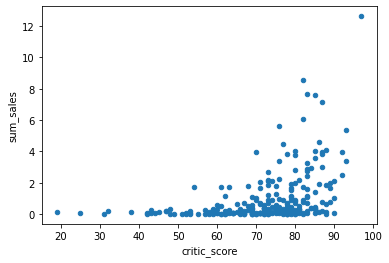

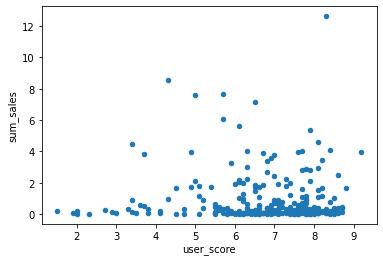

In [46]:
ps4[ps4["critic_score"] != -1].plot(kind = "scatter", x = "critic_score", y = "sum_sales")
ps4[ps4["user_score"] != -1].plot(kind = "scatter", x = "user_score", y = "sum_sales")
plt.subplot()

In [47]:
ps4["sum_sales"].corr(ps4["critic_score"])

0.22652606614612347

Линейная зависимость между рейтингом критиков и количеством проданных копий небольшая. Есть как игры с небольшими продажами и низким рейтингом, так и с высоким и наоборот. Таким образом можно сказать, что игроки смотрят на критерий оценки критиков далеко не в первую очередь при покупке игры.

In [48]:
ps4["sum_sales"].corr(ps4["user_score"])

0.11596149312860098

При этом линейная зависимость между количеством продаж и рейтингом пользователей отсутствует. При покупке пользователи не обращают внимание на этот критерий, либо очень популярные игры не оправдывают ожиданий пользователей и критиков.

Рассмотрим графики для xbox и pc b проверим линейную зависимость между оценками критиков и пользователей и цены.

/tmp/ipykernel_43/1365323422.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

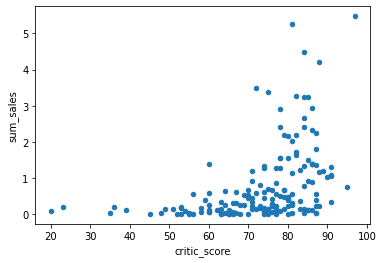

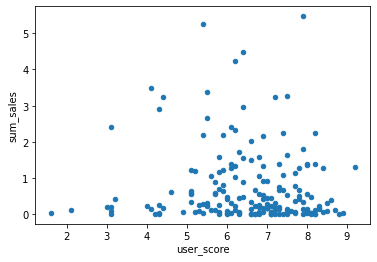

In [64]:
xbox[xbox["critic_score"] != -1].plot(kind = "scatter", x = "critic_score", y = "sum_sales")
xbox[xbox["user_score"] != -1].plot(kind = "scatter", x = "user_score", y = "sum_sales")
plt.subplot()

/tmp/ipykernel_43/849974.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

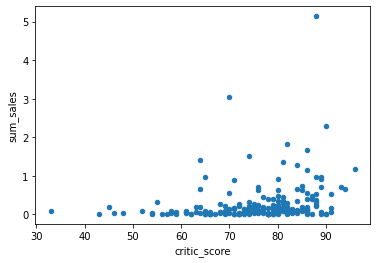

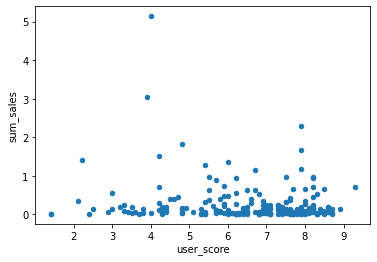

In [66]:
pc[pc["critic_score"] != -1].plot(kind = "scatter", x = "critic_score", y = "sum_sales")
pc[pc["user_score"] != -1].plot(kind = "scatter", x = "user_score", y = "sum_sales")
plt.subplot()

Для других платформ также видно, что линейная зависимость либо очень мала, либо ее вообще не прослеживается, поэтому можно сделать вывод, что пользователи либо при покупке не смотрят на отзывы, либо игры не оправдывают ожидание критиков и игроков от них.

Теперь рассмотрим игры по жанрам и определим какие жанры более популярные, а какие менее.

In [51]:
genre = data.pivot_table(index = "genre", values = "sum_sales", aggfunc = "sum").sort_values(by = "sum_sales", ascending = False)
genre

,sum_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Из общего распределения игр по жанрам видно, что наиболее популярные экшен игры, также чуть менее спортивные симмуляторы и шутеры. Наимее популярными являются стратегии и пазлы.

Теперь рассмортим жанры игр по медиане суммарных продаж игр, это покажет жанры игр которые приносят высокий доход стабильно, не учитывая высокий доход с выбросов.

In [52]:
genre_median = data.pivot_table(index = "genre", values = "sum_sales", aggfunc = "median").sort_values(by = "sum_sales", ascending = False)
genre_median

,sum_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


А рассматривая жанры игр по медианам продаж, видно что в среднем самые популярные игры - шутеры и спортивные, а самые непопулярные пазлы и приключения. Экшн игры в по медианным продажам находятся в середине топа. Из этого можно сделать вывод, что в среднем из всех игр чаще покупают шутеры, а экшены имеют большее суммарное количество продаж только благодаря некоторым выбросам - очень популярным играм, но из общей выборки такого жанра их очень мало.

Таким образом быломпроведено исследование данных, выявлен примерный отрезок "жизни" платформ, определены самые популярные и наиболее перспективные платформы на 2017 год, а также проверена линейная зависимость между оценками и продажами. Также были рассморены жанры игр по их популярности.

Теперь рассмотрим самые популярные платформы, жанры в разных регионах. А также определим влияние возрастного рейтинго на продажи ро регионам.

In [53]:
platform_region_na = data.pivot_table(index = "platform", columns = "year_of_release", values = "na_sales", aggfunc = "sum").fillna(0)
pl_reg_na = data.pivot_table(index = "platform", values = "na_sales", aggfunc = "sum")
platform_region_na = platform_region_na.join(pl_reg_na, how = "left")
platform_region_na.sort_values(by = "na_sales", ascending = False).head(5)

,2012,2013,2014,2015,2016,na_sales
platform,,,,,,
X360,58.39,53.36,20.25,7.36,0.69,140.05
PS4,0.00,10.13,34.75,42.37,21.49,108.74
PS3,39.88,41.45,16.39,4.99,0.67,103.38
XOne,0.00,11.85,30.97,36.03,14.27,93.12
3DS,17.11,15.56,12.33,6.17,4.14,55.31


С 2006 года самыми популярными платформами являются в NA является xbox 360. По таблице можно сказать, что амереканцы больше любят пользоваться консолями, чем ПК, но используют большие консоли чаще, чем портативные. Для консолей 3 поколения покупок игр на Xbox почти на 200 млн больше, чем на PS3 скорее всего из-за более развитой экосистемы майкрософт в США. ТАкже считаю необходимым рассмотреть самые популярные современные консоли.

In [54]:
platform_region_na.sort_values(by = 2016, ascending = False).head(5)

,2012,2013,2014,2015,2016,na_sales
platform,,,,,,
PS4,0.00,10.13,34.75,42.37,21.49,108.74
XOne,0.00,11.85,30.97,36.03,14.27,93.12
3DS,17.11,15.56,12.33,6.17,4.14,55.31
WiiU,8.89,9.85,10.50,6.76,2.10,38.10
PC,8.01,3.88,3.51,2.36,1.36,19.12


Топ 5 современных платформ и распределение продаж игр для них примерно совпадают со всем миром. Теперь рассмотрим Европу и Японию.

In [55]:
platform_region_eu = data.pivot_table(index = "platform", columns = "year_of_release", values ="eu_sales", aggfunc = "sum").fillna(0)
pl_reg_eu = data.pivot_table(index = "platform", values = "eu_sales", aggfunc = "sum")
platform_region_eu = platform_region_eu.join(pl_reg_eu, how = "left")
platform_region_eu.sort_values(by = "eu_sales", ascending = False).head(5)

,2012,2013,2014,2015,2016,eu_sales
platform,,,,,,
PS4,0.00,11.05,46.50,51.76,31.78,141.09
PS3,39.05,42.27,18.24,6.04,1.26,106.86
X360,32.00,27.03,11.28,3.50,0.71,74.52
XOne,0.00,5.34,18.15,18.47,9.63,51.59
3DS,11.68,14.84,8.73,5.06,2.33,42.64


Для Европы самой популярной консолью является ps3. Также в Европе в топ 5 консолей с 2006 года входит PS4. Обьем игр покумаемых в Европе значительно меньше, чем в США на популярных платформах с 2006 года. Рассмотрим топ 5 консолей в Европе за 2016 год(современных)

In [56]:
platform_region_eu.sort_values(by = 2016, ascending = False).head(5)

,2012,2013,2014,2015,2016,eu_sales
platform,,,,,,
PS4,0.00,11.05,46.50,51.76,31.78,141.09
XOne,0.00,5.34,18.15,18.47,9.63,51.59
PC,12.40,7.39,8.87,5.57,3.53,37.76
3DS,11.68,14.84,8.73,5.06,2.33,42.64
WiiU,5.28,6.70,6.66,5.01,1.48,25.13


В европе и США в 2016 году популярны одни и те же платформы, как и во всем мире! Но стоит отметить, что суммарно европейцы больше тратят на игры на ps4, но гораздо меньше на xbox. Скорее всего хоть PS4 самая популярная современная платформа в США, но Xbox там имеет почти такую же популярность, в отличие от европы, где продажи игр на PS4 почти в 3 раза выше, чем на Xbox. Теперь рассмортим Японмкий рынок.

In [57]:
platform_region_jp = data.pivot_table(index = "platform", columns = "year_of_release", values ="jp_sales", aggfunc = "sum").fillna(0)
pl_reg_jp = data.pivot_table(index = "platform", values = "jp_sales", aggfunc = "sum")
platform_region_jp = platform_region_jp.join(pl_reg_jp, how = "left")
platform_region_jp.sort_values(by = "jp_sales", ascending = False).head(5)

,2012,2013,2014,2015,2016,jp_sales
platform,,,,,,
3DS,19.98,23.57,20.69,15.52,8.03,87.79
PS3,11.94,12.13,6.25,3.67,1.30,35.29
PSV,2.45,4.05,6.13,4.85,3.56,21.04
PS4,0.00,0.94,2.97,6.31,5.74,15.96
WiiU,2.13,3.57,3.19,3.45,0.67,13.01


В японии же популярными с 2006 года являются консоли фирмы nintendo. Обьемы продаж гораздо меньше, чем США и европе. Стоит заметить, что амереканские консоли майкрософт не входят в топ 5 по популярности в Японии.

In [58]:
platform_region_jp.sort_values(by = 2016, ascending = False).head(5)

,2012,2013,2014,2015,2016,jp_sales
platform,,,,,,
3DS,19.98,23.57,20.69,15.52,8.03,87.79
PS4,0.00,0.94,2.97,6.31,5.74,15.96
PSV,2.45,4.05,6.13,4.85,3.56,21.04
PS3,11.94,12.13,6.25,3.67,1.30,35.29
WiiU,2.13,3.57,3.19,3.45,0.67,13.01


Такую же тенденцию мы видим в современном рынке в Японии - консоли майкрософт не входят в топ по популрности. Также стоит отметить, что Японцы не любят играть на PC. 

Таким образом сравнив 3 рынка стоит сделать вывод, что вкусы европейцев и американцев при выборе платформы для игр схожи, за исключением того, что американцы историчеси отдают большое предпочтение консолям майкрософт или ходябы покупают примерно одинаковое количество игр на них, как на консоли сони, европейцы же отдают предпочтение консолям PS. Японцы же играют больше на консолях фирмы nintendo и sony и не любят использовать для игр xbox и PC

Теперь рассмотрим самые популярные жанры игр в NA, EU и JP

In [59]:
genre_na = data.pivot_table(index = "genre", values = "na_sales", aggfunc = "sum").sort_values(by = "na_sales", ascending = False)
genre_na["na/word"] = genre_na["na_sales"]/genre["sum_sales"] * 100
genre_na["na/word"] = genre_na["na/word"].astype("int")
genre_na.head(5)

,na_sales,na/word
genre,,
Action,177.84,40
Shooter,144.77,47
Sports,81.53,45
Role-Playing,64.00,33
Misc,38.19,44


В Северной Америке топ 5 жанр игр не отличается от самых популярных жанров игр во всем мире. Столбец na/word показывает какой процент от общемировых продаж игр жанра составляет Северная Америка. Во всех жанрах из топа, исключая ролевые игры амереканский рынок составляет примерно 40-45 процентов от общего.

In [60]:
genre_eu = data.pivot_table(index = "genre", values = "eu_sales", aggfunc = "sum").sort_values(by = "eu_sales", ascending = False)
genre_eu["eu/word"] = genre_eu["eu_sales"]/genre["sum_sales"] * 100
genre_eu["eu/word"] = genre_eu["eu/word"].astype("int")
genre_eu.head(5)

,eu_sales,eu/word
genre,,
Action,159.34,36
Shooter,113.47,37
Sports,69.09,38
Role-Playing,48.53,25
Racing,27.29,51


Топ 5 жанров в европе почти такой же как и США, но в Европе игроки больше предпочитают гонки, чем ролевые игры. Также процент продаж от общемирового гораздо ниже, чем в США.

In [61]:
genre_jp = data.pivot_table(index = "genre", values = "jp_sales", aggfunc = "sum").sort_values(by = "jp_sales", ascending = False)
genre_jp["jp/word"] = genre_jp["jp_sales"]/genre["sum_sales"] * 100
genre_jp["jp/word"] = genre_jp["jp/word"].astype("int")
genre_jp.head(5)

,jp_sales,jp/word
genre,,
Role-Playing,65.44,33
Action,52.80,11
Misc,12.86,15
Simulation,10.41,29
Fighting,9.44,21


В Японии вкусы у игроков совсем другие. Японцы больше всего покупают ролевые игры, целых 33 процента от общемирового количества копий. Также в японском топе появляются симуляторы. Японцы не так как европейцы и американцы любят шутеры - они вообще не попали в том в этом регионе. 

Таким образом мы рассмотрели топ 5 популярных в регионах жанров. Стоит отметить, что европейцы и американцы играют почти в одинаковые жанры компьютерных игр, а вот японцы имеют совершенно другие вкусы.

Теперь рассмотрим как возрастной рейтинг влияет на продажи игр в отдельных регионах.

In [62]:
esrb_na = data.pivot_table(index = "rating", values = "na_sales", aggfunc = "sum")
esrb_na

,na_sales
rating,
E,114.37
E10+,75.70
M,231.57
T,66.02
Unknown,103.31


<AxesSubplot:ylabel='na_sales'>

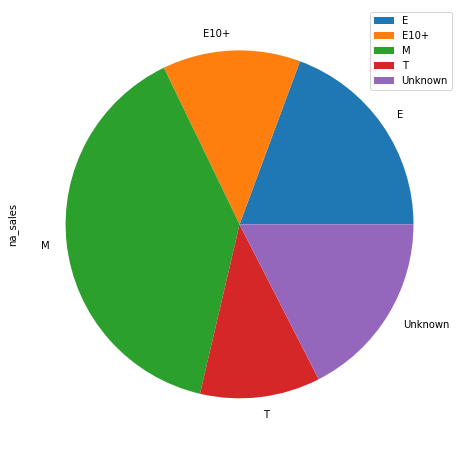

In [67]:
esrb_na.plot(kind = "pie", y = "na_sales", figsize = (10,8))

В Северной Америке самыми продаваемыми являются игры с рецтингом М. Игры для детей и для тинейджеров примерно одинаковы по продажам. Игр для всех - с рейтингом E, больше чем для тинейджеров и детей, но меньше чем для взрослых

In [68]:
esrb_eu = data.pivot_table(index = "rating", values = "eu_sales", aggfunc = "sum")
esrb_eu

,eu_sales
rating,
E,113.03
E10+,55.37
M,193.96
T,52.96
Unknown,91.50


<AxesSubplot:ylabel='eu_sales'>

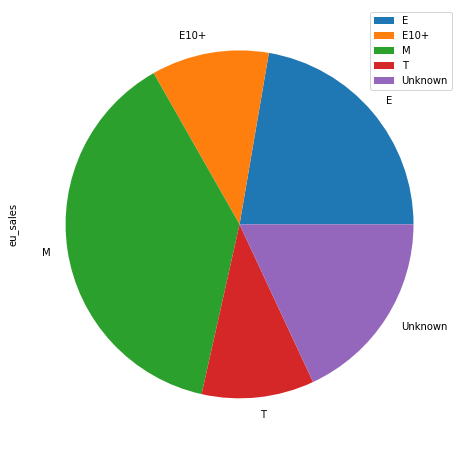

In [69]:
esrb_eu.plot(kind = "pie", y = "eu_sales", figsize = (10,8))

Распределнение игр по возрастному рейтингу в Европе такое же как в США.

In [70]:
esrb_jp = data.pivot_table(index = "rating", values = "jp_sales", aggfunc = "sum")
esrb_jp

,jp_sales
rating,
E,28.33
E10+,8.19
M,21.20
T,26.02
Unknown,108.84


<AxesSubplot:ylabel='jp_sales'>

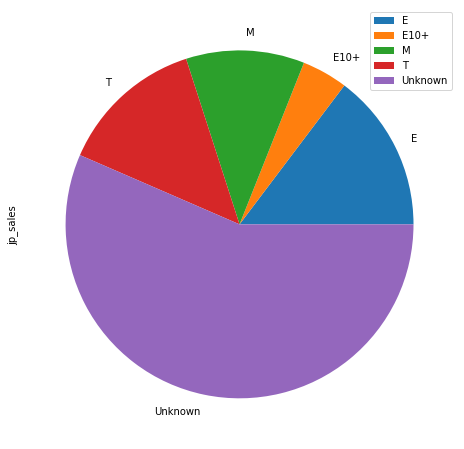

In [71]:
esrb_jp.plot(kind = "pie", y = "jp_sales", figsize = (10,8))

В Японии распределение иное. Игры для детей продаются меньше всего. Игр для тинейджеров и для всех возрастов продается примерно одинаковое количество и больше всех. Также на Японском рейтинге множество игр без ретинга. Такое возможно так как в Японии возрастной рейтинг устанавливает своя организация CERO

Мной был проведен анализ зависимости количества проданных копий игры от ее возрастного рейтинга. В Европе и США самые популярные игры для взрослых, а менее популярные для тинейджеров и детей. В Японии же наоборот - игры для тинейджеров гораздо популярнее игр для взрослых.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично! Теперь мы увидели, что в Японии этот рейтинг часто не ставят, и ты правильно объяснил этот феномен
</div>

Далее приступим к проверки гипотез. Первой гипотезой является, то, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для проверки гипотез необходимо ввести нулевую и альтернативную гипотезу. Нулевая гипотеза - и является проаеряемой нами - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернаивная же гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются. Критический уровень возьмем равный 0.05. Если данные не будут протеворечить нулевой гипотезе, то возьмем ее как верную. Так как выборки разных размеров, параметр equal_var возьмем равным false. Приступим к проверки:

In [72]:
test = st.ttest_ind(xbox["user_score"], pc["user_score"], equal_var = False)

Сравним уровень значимости с критическим:

In [73]:
if test.pvalue < 0.05:
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Нельзя отвергнуть нулевую гипотезу")
print(test.pvalue)

Нельзя отвергнуть нулевую гипотезу
0.05619765758385681


Из теста видно, что данные показывают на состоятельность нулевой гипотезы. Таким образом будем считать верной гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Преступим к проверки второй гипотезы - средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная - средние пользовательские рейтинги жанров Action и Sports разные. Альфа возьмем равной 0.05.

In [74]:
action = data[data["genre"] == "Action"]
sport = data[data["genre"] == "Sports"]

In [75]:
test_1 = st.ttest_ind(action["user_score"], sport["user_score"], equal_var = False)

In [76]:
if test_1.pvalue < 0.05:
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Нельзя отвергнуть нулевую гипотезу")
print(test_1.pvalue)

Необходимо отвергнуть нулевую гипотезу
0.0020018209559324713


Тест показыавет необходимость отвергнуть нулевую гипотезу. Следовательно возьмем как верную гипотезу - средние пользовательские рейтинги жанров Action и Sports разные.

Мной были проверены 2 гипотезы. По выборкам будем считать верными во всец генеральной совокупности, то что средние пользовательские рейтинги платформ Xbox One и PC различаются и средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гипотезы сформулированы правильно, тесты проведены тоже верно, выводы из них корректные.

При изменении выборки (когда ты изменишь временной интервал и возьмешь данные не с 2006 года) значения тестов могут измениться, обрати внимание
</div>

<b> Общий вывод </b>

В данном проекте мной был предобработан и проанализирован датасет и выявлены некоторые закономерности для опередения игр в рекламу которых будет выгодно вложиться в 2017 году. Исходя из проведенных исследований мной было выявлено, что самая популярная платформа в 2017 году будет являться PS4, так как эта консоль популярна в трех основных регионах и имеет высокую относительно других платформ медиану количествва проданных копий игр, также возможны большие выбросы. Также не стоит забывать про Xbox ONE, PC, и некоторые консоли от nintendo. Cамый популярный жанр экшен - его любят в 3 основных регионах. Также стоит вкладываться в рекламу либо игр для всех возрастов или игр для взрослых. Для Японского рынка - игры для подросков и игры для всех возрастов. Исследования показали, что не стоит обращать внимание на оценки игр, на них пользователи смотрят далеко не в первую очередь. Таким образом идеальная игра для продвижения - игра для PS4 в жанре шутер, с возрастным ограничением для взрослых.


Считаю все задания выполненными, а работу готовой к проверке.

<blockquote>

**Общий вывод по проекту**

Спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях.

**Отмечу отдельные положительные моменты проекта**:

* На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
* Ты использовал самые разные методы для работы с данными, все получилось!
* На каждом шагу писал подробные выводы

**Что нужно исправить:**:
* На стадии предобработки исправить замену оценок критиков, пользователей и возрастного рейтинга
* Изменить выборку для прогнозов - взять период с 2012 года
* Лучший жанр определять по средним/медианным продажам, а не суммарным
* Добавить анализ корреляций для еще 2 платформ.
* Исправить график ящика с усами, убрав с него выбросы.
* Также я бы посоветовал немного больше внимания уделить оформлению, например, чаще использовать ячейки типа Markdown и заголовки в них
* Остальные рекомендации ты найдешь в комментариях проекта
    
Если есть вопросы, я готов на них ответить.
    
Для работы с графиками я бы посоветовал обратить внимание на этот гайд на русском языке к библиотеке seaborn, с её помощью получаются красивые графики, и она не сложна для изучения. Можно просто посмотреть картинки и потом уже вчитаться в код как их получили https://nbviewer.org/urls/mipt-stats.gitlab.io/courses/python/09_seaborn.ipynb

**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>

<blockquote>

**Общий вывод по проекту v.2**

Почти всё исправлено! Осталось чуть чуть:
* Нужно убрать значения заглушки для пропусков из анализа корреляций
* Нужно оставить категорию с неизвестным возрастным рейтингом при его анализе 
    

**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>

<blockquote>

**Общий вывод по проекту v.3**

Критичных замечаний больше нет, проект принимаю
    

**Желаю удачи с дальнейшим прохождением курса, у тебя всё получится!**
</blockquote>